In [1]:
#conda install -c conda-forge scikit-surprise

In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline

from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

In [5]:
# Load and preprocess the data set - set customer number as the index
catalog_df_original = pd.read_csv('CatalogCrossSell.csv')
catalog_df_original.set_index('Customer Number', inplace=True)
catalog_df_original

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
Customer Number,,,,,,,,,
11569,0,1,1,1,1,0,0,1,0
13714,0,1,1,1,1,0,1,1,1
46391,0,1,1,1,1,0,1,1,1
67264,0,0,1,1,1,0,1,1,0
67363,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
337441034,0,0,1,0,0,0,0,0,0
337498968,0,1,1,0,0,0,1,0,1
337516678,0,0,1,0,1,0,0,0,1


In [6]:
names_clean = {}

for name in catalog_df_original.columns:
    new_name = name.replace(" Division","")
    names_clean[name] = new_name

print(names_clean)

{'Clothing Division': 'Clothing', 'Housewares Division': 'Housewares', 'Health Products Division': 'Health Products', 'Automotive Division': 'Automotive', 'Personal Electronics Division': 'Personal Electronics', 'Computers Division': 'Computers', 'Garden Division': 'Garden', 'Novelty Gift Division': 'Novelty Gift', 'Jewelry Division': 'Jewelry'}


In [7]:
catalog_df_original.rename(columns=names_clean, inplace=True)
catalog_df_original

,Clothing,Housewares,Health Products,Automotive,Personal Electronics,Computers,Garden,Novelty Gift,Jewelry
Customer Number,,,,,,,,,
11569,0,1,1,1,1,0,0,1,0
13714,0,1,1,1,1,0,1,1,1
46391,0,1,1,1,1,0,1,1,1
67264,0,0,1,1,1,0,1,1,0
67363,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
337441034,0,0,1,0,0,0,0,0,0
337498968,0,1,1,0,0,0,1,0,1
337516678,0,0,1,0,1,0,0,0,1


In [8]:
# data exploration | COUNT OF MISSING VALUES 
catalog_df_original.isnull().sum()

Clothing                0
Housewares              0
Health Products         0
Automotive              0
Personal Electronics    0
Computers               0
Garden                  0
Novelty Gift            0
Jewelry                 0
dtype: int64

In [9]:
#data exploration | data types

catalog_df_original.dtypes

Clothing                int64
Housewares              int64
Health Products         int64
Automotive              int64
Personal Electronics    int64
Computers               int64
Garden                  int64
Novelty Gift            int64
Jewelry                 int64
dtype: object

In [10]:
#data exploration | find items frequency to check if we have divisions that require special attention
#(frequency=support of each single division)

itemFrequency = catalog_df_original.sum(axis=0) / len(catalog_df_original)

print(itemFrequency)

Clothing                0.033013
Housewares              0.393557
Health Products         1.000000
Automotive              0.134854
Personal Electronics    0.467387
Computers               0.046819
Garden                  0.272109
Novelty Gift            0.227491
Jewelry                 0.356943
dtype: float64


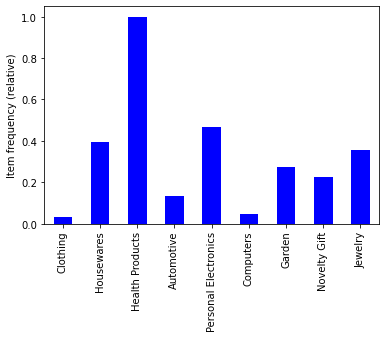

In [11]:
# data exploration | plot as bar chart

ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [12]:
# data cleaning | health product division has a support of 100%, it's in all the transactions so we remove it

catalog_df = catalog_df_original.drop("Health Products", axis=1)

catalog_df

,Clothing,Housewares,Automotive,Personal Electronics,Computers,Garden,Novelty Gift,Jewelry
Customer Number,,,,,,,,
11569,0,1,1,1,0,0,1,0
13714,0,1,1,1,0,1,1,1
46391,0,1,1,1,0,1,1,1
67264,0,0,1,1,0,1,1,0
67363,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...
337441034,0,0,0,0,0,0,0,0
337498968,0,1,0,0,0,1,0,1
337516678,0,0,0,1,0,0,0,1


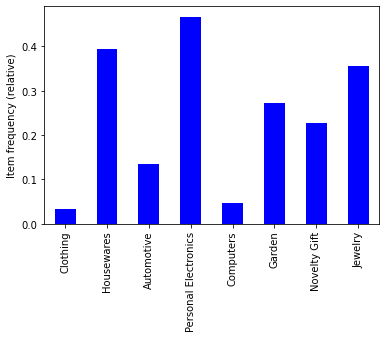

In [13]:
# data exploration | plot new bar chart
itemFrequency = catalog_df.sum(axis=0) / len(catalog_df)

ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [14]:
# create frequent itemsets - only those with support > 0.1 - "itemsets" that appear at least in 10% of transactions

itemsets = apriori(catalog_df, min_support =0.1, use_colnames=True)
print(itemsets)

     support                                          itemsets
0   0.393557                                      (Housewares)
1   0.134854                                      (Automotive)
2   0.467387                            (Personal Electronics)
3   0.272109                                          (Garden)
4   0.227491                                    (Novelty Gift)
5   0.356943                                         (Jewelry)
6   0.235494                (Housewares, Personal Electronics)
7   0.132853                              (Housewares, Garden)
8   0.134854                        (Housewares, Novelty Gift)
9   0.194878                             (Housewares, Jewelry)
10  0.163265                    (Personal Electronics, Garden)
11  0.169068              (Personal Electronics, Novelty Gift)
12  0.197479                   (Personal Electronics, Jewelry)
13  0.112245                            (Novelty Gift, Garden)
14  0.127251                                 (Jewelry, 

C:\Users\alamb\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
# and convert into rules --> define antecedents and consequents and provide performance evaluation metrics

rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Housewares, Novelty Gift)",(Personal Electronics),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120
11,"(Personal Electronics, Jewelry)",(Housewares),0.197479,0.393557,0.132053,0.668693,1.699099,0.054333,1.830455
8,"(Personal Electronics, Novelty Gift)",(Housewares),0.169068,0.393557,0.107843,0.637870,1.620780,0.041305,1.674654
5,(Novelty Gift),(Personal Electronics),0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908
9,"(Housewares, Personal Electronics)",(Jewelry),0.235494,0.356943,0.132053,0.560748,1.570974,0.047995,1.463981
2,(Novelty Gift),(Housewares),0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255
10,"(Housewares, Jewelry)",(Personal Electronics),0.194878,0.467387,0.132053,0.677618,1.449801,0.040969,1.652118
3,(Jewelry),(Housewares),0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671
4,(Garden),(Personal Electronics),0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533
0,(Housewares),(Personal Electronics),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139


In [16]:
# filter to get rules with single consequents only 

rules_single = rules[[len(c) == 1 for c in rules.consequents]]
rules_single.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Housewares, Novelty Gift)",(Personal Electronics),0.134854,0.467387,0.107843,0.799703,1.711009,0.044814,2.659120
11,"(Personal Electronics, Jewelry)",(Housewares),0.197479,0.393557,0.132053,0.668693,1.699099,0.054333,1.830455
8,"(Personal Electronics, Novelty Gift)",(Housewares),0.169068,0.393557,0.107843,0.637870,1.620780,0.041305,1.674654
5,(Novelty Gift),(Personal Electronics),0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908
9,"(Housewares, Personal Electronics)",(Jewelry),0.235494,0.356943,0.132053,0.560748,1.570974,0.047995,1.463981
2,(Novelty Gift),(Housewares),0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255
10,"(Housewares, Jewelry)",(Personal Electronics),0.194878,0.467387,0.132053,0.677618,1.449801,0.040969,1.652118
3,(Jewelry),(Housewares),0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671
4,(Garden),(Personal Electronics),0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533
0,(Housewares),(Personal Electronics),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139


In [17]:
#keep only performance evaluation metrics we want to analyze

rules_single.sort_values(by=['lift'], ascending=
                         False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25)

,antecedents,consequents,support,confidence,lift,leverage
7,"(Housewares, Novelty Gift)",(Personal Electronics),0.107843,0.799703,1.711009,0.044814
11,"(Personal Electronics, Jewelry)",(Housewares),0.132053,0.668693,1.699099,0.054333
8,"(Personal Electronics, Novelty Gift)",(Housewares),0.107843,0.637870,1.620780,0.041305
5,(Novelty Gift),(Personal Electronics),0.169068,0.743184,1.590082,0.062741
9,"(Housewares, Personal Electronics)",(Jewelry),0.132053,0.560748,1.570974,0.047995
2,(Novelty Gift),(Housewares),0.134854,0.592788,1.506230,0.045323
10,"(Housewares, Jewelry)",(Personal Electronics),0.132053,0.677618,1.449801,0.040969
3,(Jewelry),(Housewares),0.194878,0.545964,1.387254,0.054400
4,(Garden),(Personal Electronics),0.163265,0.600000,1.283733,0.036085
0,(Housewares),(Personal Electronics),0.235494,0.598373,1.280252,0.051551


Text(0.5, 1.0, 'Lift Bar Chart')

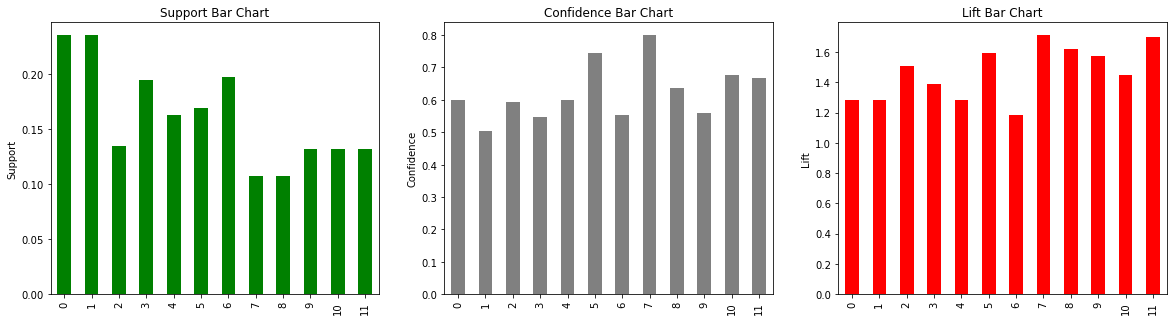

In [18]:
# draw support, confidence, and lift bar charts

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# draw the Support graph
rules_single['support'].plot.bar(color='green', ax=ax1)
ax1.set_ylabel('Support')
ax1.set_title('Support Bar Chart')

# draw the Confidence graph
rules_single['confidence'].plot.bar(color='grey', ax=ax2)
ax2.set_ylabel('Confidence')
ax2.set_title('Confidence Bar Chart')

# draw the Lift graph
rules_single['lift'].plot.bar(color='red', ax=ax3)
ax3.set_ylabel('Lift')
ax3.set_title('Lift Bar Chart')

In [19]:
#create excel file of items frequency to build visuals in tableau/excel

itemFrequency.to_excel('ItemFrequency.xlsx', index=True)

In [21]:
#create excel file of rules and metrics to create visuals in tableau/excel

rules_single.to_excel('RulesTable.xlsx', index=True)

In interpreting results, it is useful to look at the various measures:
* The support for the rule indicates its impact in terms of overall size: How many transactions are affected? If only a small number of transactions are affected, the rule may be of little use (unless the consequent is very valuable and/or the rule is very efficient in finding it).

* The lift ratio indicates how efficient the rule is in finding consequents, compared to random selection. A very efficient rule is preferred to an inefficient rule, but we must still consider support: A very efficient rule that has very low support may not be as desirable as a less efficient rule with much greater support.

* The confidence tells us at what rate consequents will be found, and is useful in determining the business or operational usefulness of a rule: A rule with low confidence may find consequents at too low a rate to be worth the cost of (say) promoting the consequent in all the transactions that involve the antecedent.